In [1]:
#for linux create relative directories for storing image
!mkdir -p /data/zlpppp/ct/segmentation
!mkdir -p /data/zlpppp/ct/segmentation/test
!mkdir -p /data/zlpppp/ct/segmentation/train
!mkdir -p /data/zlpppp/ct/segmentation/train/augmentation
!mkdir -p /data/zlpppp/ct/segmentation/train/image
!mkdir -p /data/zlpppp/ct/segmentation/train/mask
!mkdir -p /data/zlpppp/ct/segmentation/train/dilate
!mkdir -p /data/zlpppp/ct/segmentation/test/augmentation
!mkdir -p /data/zlpppp/ct/segmentation/test/image
!mkdir -p /data/zlpppp/ct/segmentation/test/mask
!mkdir -p /data/zlpppp/ct/segmentation/test/dilate

In [2]:
# import relative packages
import os
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm
from utils import *
from pathlib import Path


In [3]:
# Define appropriate constants for directory
INPUT_DIR = '/data/zlpppp/ct'
INPUT_DIR = result = Path(INPUT_DIR).as_posix()
SEGMENTATION_DIR = os.path.join(INPUT_DIR, "segmentation")
SEGMENTATION_TEST_DIR = os.path.join(SEGMENTATION_DIR, "test")
SEGMENTATION_TRAIN_DIR = os.path.join(SEGMENTATION_DIR, "train")
SEGMENTATION_AUG_DIR = os.path.join(SEGMENTATION_TRAIN_DIR, "augmentation")
SEGMENTATION_IMAGE_DIR = os.path.join(SEGMENTATION_TRAIN_DIR, "image")
SEGMENTATION_MASK_DIR = os.path.join(SEGMENTATION_TRAIN_DIR, "mask")
SEGMENTATION_DILATE_DIR = os.path.join(SEGMENTATION_TRAIN_DIR, "dilate")
SEGMENTATION_SOURCE_DIR = os.path.join(INPUT_DIR, \
                                       "pulmonary-chest-xray-abnormalities")
SEGMENTATION_TEST_IMAGE_DIR = os.path.join(SEGMENTATION_TEST_DIR, 'image')
SEGMENTATION_TEST_MASK_DIR = os.path.join(SEGMENTATION_TEST_DIR, 'mask')
SEGMENTATION_TEST_DILATE_DIR = os.path.join(SEGMENTATION_TEST_DIR, 'dilate')

SHENZHEN_TRAIN_DIR = os.path.join(SEGMENTATION_SOURCE_DIR, "ChinaSet_AllFiles", \
                                  "ChinaSet_AllFiles")
SHENZHEN_IMAGE_DIR = os.path.join(SHENZHEN_TRAIN_DIR, "CXR_png")
SHENZHEN_MASK_DIR = os.path.join(INPUT_DIR, "shcxr-lung-mask", "mask", "mask")

MONTGOMERY_TRAIN_DIR = os.path.join(SEGMENTATION_SOURCE_DIR, \
                                    "Montgomery", "MontgomerySet")
MONTGOMERY_IMAGE_DIR = os.path.join(MONTGOMERY_TRAIN_DIR, "CXR_png")
MONTGOMERY_LEFT_MASK_DIR = os.path.join(MONTGOMERY_TRAIN_DIR, \
                                        "ManualMask", "leftMask")
MONTGOMERY_RIGHT_MASK_DIR = os.path.join(MONTGOMERY_TRAIN_DIR, \
                                         "ManualMask", "rightMask")
print(SEGMENTATION_AUG_DIR)
DILATE_KERNEL = np.ones((15, 15), np.uint8)


/data/zlpppp/ct/segmentation/train/augmentation


In [4]:
montgomery_left_mask_dir = glob(os.path.join(MONTGOMERY_LEFT_MASK_DIR, '*.png'))
random.shuffle(montgomery_left_mask_dir)
montgomery_test = montgomery_left_mask_dir[0:20]
montgomery_train= montgomery_left_mask_dir[20:]

for left_image_file in tqdm(montgomery_left_mask_dir):
    base_file = os.path.basename(left_image_file)
    image_file = os.path.join(MONTGOMERY_IMAGE_DIR, base_file)
    right_image_file = os.path.join(MONTGOMERY_RIGHT_MASK_DIR, base_file)

    image = cv2.imread(image_file)
    left_mask = cv2.imread(left_image_file, cv2.IMREAD_GRAYSCALE)
    right_mask = cv2.imread(right_image_file, cv2.IMREAD_GRAYSCALE)
    
    image = cv2.resize(image, (512, 512))
    left_mask = cv2.resize(left_mask, (512, 512))
    right_mask = cv2.resize(right_mask, (512, 512))
    
    mask = np.maximum(left_mask, right_mask)
    mask_dilate = cv2.dilate(mask, DILATE_KERNEL, iterations=1)
    
    if (left_image_file in montgomery_train):
        cv2.imwrite(os.path.join(SEGMENTATION_IMAGE_DIR, base_file), \
                    image)
        cv2.imwrite(os.path.join(SEGMENTATION_MASK_DIR, base_file), \
                    mask)
        cv2.imwrite(os.path.join(SEGMENTATION_DILATE_DIR, base_file), \
                    mask_dilate)
    else:
        filename, fileext = os.path.splitext(base_file)
        cv2.imwrite(os.path.join(SEGMENTATION_TEST_IMAGE_DIR, base_file), \
                    image)
        cv2.imwrite(os.path.join(SEGMENTATION_TEST_MASK_DIR, \
                                 "%s_mask%s" % (filename, fileext)), mask)
        cv2.imwrite(os.path.join(SEGMENTATION_TEST_DILATE_DIR, \
                                 "%s_dilate%s" % (filename, fileext)), mask_dilate)
        
print('finished')

100%|██████████| 138/138 [01:42<00:00,  1.34it/s]

finished


(512, 512, 3)
(512, 512, 3)
[  0   1   2   3   4   5   7   8   9  11  13  14  15  17  19  21  23  27
  28  29  32  33  35  37  39  40  41  43  45  46  54  55  57  58  59  61
  62  63  65  66  68  69  72  75  76  77  83  87  92  93  94  95  99 102
 104 112 113 114 117 118 120 121 122 124 127 128 131 132 134 135 136 139
 142 145 148 150 151 152 156 158 162 163 165 167 168 170 174 176 180 182
 185 186 187 188 190 192 195 196 198 199 200 201 202 207 208 216 221 225
 226 228 234 236 238 239 240 241 242 243 244 246 247 248 250 253 254 255]


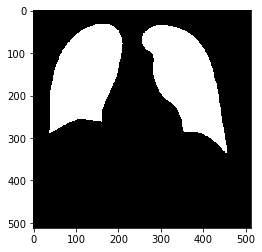

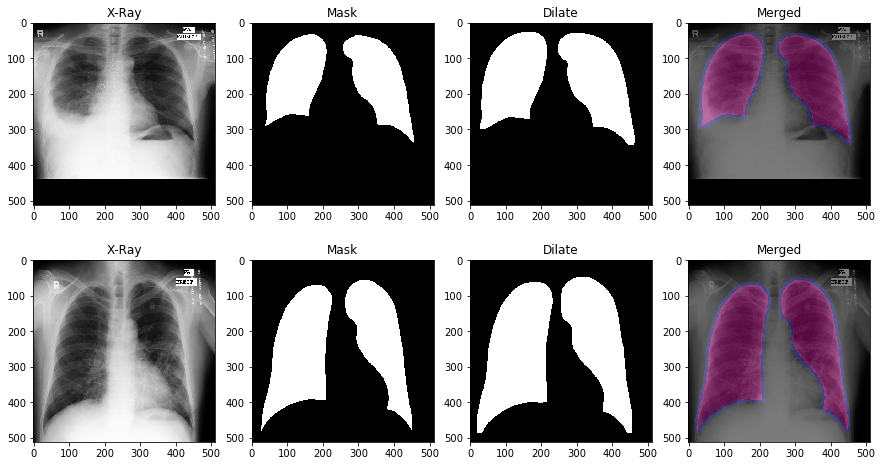

In [5]:
base_file = os.path.basename(montgomery_train[0])

image_file = os.path.join(SEGMENTATION_IMAGE_DIR, base_file)
mask_image_file = os.path.join(SEGMENTATION_MASK_DIR, base_file)
dilate_image_file = os.path.join(SEGMENTATION_DILATE_DIR, base_file)

image = cv2.imread(image_file)
print(image.shape)
mask_image = cv2.imread(mask_image_file)
GrayImage=cv2.cvtColor(mask_image,cv2.COLOR_BGR2GRAY)
_,thresh=cv2.threshold(GrayImage,127,255,cv2.THRESH_BINARY)
# plt.imshow(mask_image)
plt.imshow(thresh,'gray')
# print(np.unique(mask_image[:,:,1]))
dilate_image = cv2.imread(dilate_image_file)
print(dilate_image.shape)
print(np.unique(dilate_image[:,:,1]))
merged_image = add_colored_dilate(image, mask_image, dilate_image)
                          
fig, axs = plt.subplots(2, 4, figsize=(15, 8))

axs[0, 0].set_title("X-Ray")
axs[0, 0].imshow(image)

axs[0, 1].set_title("Mask")
axs[0, 1].imshow(mask_image)

axs[0, 2].set_title("Dilate")
axs[0, 2].imshow(dilate_image)

axs[0, 3].set_title("Merged")
axs[0, 3].imshow(merged_image)

base_file = os.path.basename(montgomery_test[0])
filename, fileext = os.path.splitext(base_file)
image_file = os.path.join(SEGMENTATION_TEST_IMAGE_DIR, base_file)
mask_image_file = os.path.join(SEGMENTATION_TEST_MASK_DIR, \
                               "%s_mask%s" % (filename, fileext))
dilate_image_file = os.path.join(SEGMENTATION_TEST_DILATE_DIR, \
                                 "%s_dilate%s" % (filename, fileext))

image = cv2.imread(image_file)
mask_image = cv2.imread(mask_image_file)
dilate_image = cv2.imread(dilate_image_file)
merged_image = add_colored_dilate(image, mask_image, dilate_image)

axs[1, 0].set_title("X-Ray")
axs[1, 0].imshow(image)

axs[1, 1].set_title("Mask")
axs[1, 1].imshow(mask_image)

axs[1, 2].set_title("Dilate")
axs[1, 2].imshow(dilate_image)

axs[1, 3].set_title("Merged")
axs[1, 3].imshow(merged_image)

In [6]:
shenzhen_mask_dir = glob(os.path.join(SHENZHEN_MASK_DIR, '*.png'))
random.shuffle(shenzhen_mask_dir)
shenzhen_test = shenzhen_mask_dir[0:80]
shenzhen_train= shenzhen_mask_dir[80:]

for mask_file in tqdm(shenzhen_mask_dir):
    base_file = os.path.basename(mask_file).replace("_mask", "")
    image_file = os.path.join(SHENZHEN_IMAGE_DIR, base_file)

    image = cv2.imread(image_file)
    mask = cv2.imread(mask_file, cv2.IMREAD_GRAYSCALE)
        
    image = cv2.resize(image, (512, 512))
    mask = cv2.resize(mask, (512, 512))
    mask_dilate = cv2.dilate(mask, DILATE_KERNEL, iterations=1)
    
    if (mask_file in shenzhen_train):
        cv2.imwrite(os.path.join(SEGMENTATION_IMAGE_DIR, base_file), \
                    image)
        cv2.imwrite(os.path.join(SEGMENTATION_MASK_DIR, base_file), \
                    mask)
        cv2.imwrite(os.path.join(SEGMENTATION_DILATE_DIR, base_file), \
                    mask_dilate)
    else:
        filename, fileext = os.path.splitext(base_file)

        cv2.imwrite(os.path.join(SEGMENTATION_TEST_IMAGE_DIR, base_file), \
                    image)
        cv2.imwrite(os.path.join(SEGMENTATION_TEST_MASK_DIR, \
                                 "%s_mask%s" % (filename, fileext)), mask)
        cv2.imwrite(os.path.join(SEGMENTATION_TEST_DILATE_DIR, \
                                 "%s_dilate%s" % (filename, fileext)), mask_dilate)
print('finished')

100%|██████████| 566/566 [03:09<00:00,  2.98it/s]

finished


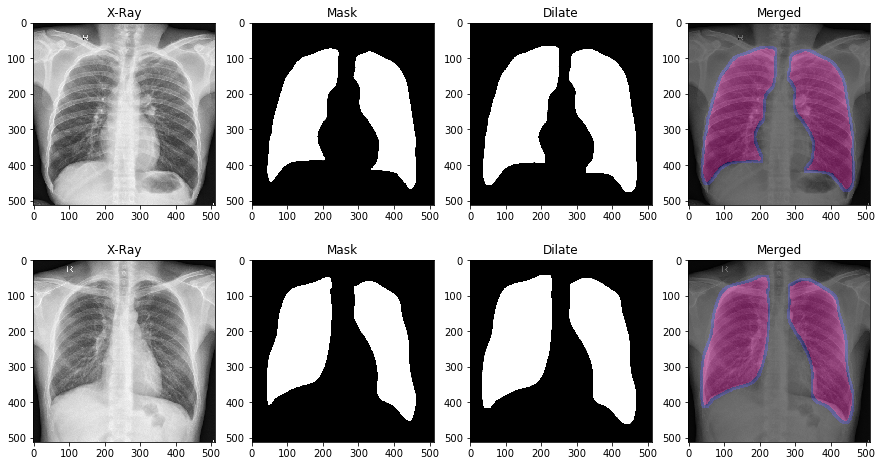

In [7]:
base_file = os.path.basename(shenzhen_train[0].replace("_mask", ""))

image_file = os.path.join(SEGMENTATION_IMAGE_DIR, base_file)
mask_image_file = os.path.join(SEGMENTATION_MASK_DIR, base_file)
dilate_image_file = os.path.join(SEGMENTATION_DILATE_DIR, base_file)

image = cv2.imread(image_file)
mask_image = cv2.imread(mask_image_file)
dilate_image = cv2.imread(dilate_image_file)
merged_image = add_colored_dilate(image, mask_image, dilate_image)
                          
fig, axs = plt.subplots(2, 4, figsize=(15, 8))

axs[0, 0].set_title("X-Ray")
axs[0, 0].imshow(image)

axs[0, 1].set_title("Mask")
axs[0, 1].imshow(mask_image)

axs[0, 2].set_title("Dilate")
axs[0, 2].imshow(dilate_image)

axs[0, 3].set_title("Merged")
axs[0, 3].imshow(merged_image)

base_file = os.path.basename(shenzhen_test[0].replace("_mask", ""))
image_file = os.path.join(SEGMENTATION_TEST_DIR, base_file)
filename, fileext = os.path.splitext(base_file)
mask_image_file = os.path.join(SEGMENTATION_TEST_DIR, \
                               "%s_mask%s" % (filename, fileext))

filename, fileext = os.path.splitext(base_file)
image_file = os.path.join(SEGMENTATION_TEST_IMAGE_DIR, base_file)
mask_image_file = os.path.join(SEGMENTATION_TEST_MASK_DIR, \
                               "%s_mask%s" % (filename, fileext))
dilate_image_file = os.path.join(SEGMENTATION_TEST_DILATE_DIR, \
                                 "%s_dilate%s" % (filename, fileext))

image = cv2.imread(image_file)
mask_image = cv2.imread(mask_image_file)
dilate_image = cv2.imread(dilate_image_file)
merged_image = add_colored_dilate(image, mask_image, dilate_image)

axs[1, 0].set_title("X-Ray")
axs[1, 0].imshow(image)

axs[1, 1].set_title("Mask")
axs[1, 1].imshow(mask_image)

axs[1, 2].set_title("Dilate")
axs[1, 2].imshow(dilate_image)

axs[1, 3].set_title("Merged")
axs[1, 3].imshow(merged_image)